In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('result-detection.csv')
df.head()



,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
0,./testing/Mata/Terbuka/0001.jpg,./detect/Mata/Terbuka/0001.jpg,./testing/Mata/Terbuka/0001.jpg,0.275692,0.348745,0.312218,Terbuka,Terbuka
1,./testing/Mata/Terbuka/0002.jpg,./detect/Mata/Terbuka/0002.jpg,./testing/Mata/Terbuka/0002.jpg,0.257408,0.334117,0.295763,Terbuka,Terbuka
2,./testing/Mata/Terbuka/0003.jpg,./detect/Mata/Terbuka/0003.jpg,./testing/Mata/Terbuka/0003.jpg,0.254613,0.220641,0.237627,Terbuka,Tertutup
3,./testing/Mata/Terbuka/0004.jpg,./detect/Mata/Terbuka/0004.jpg,./testing/Mata/Terbuka/0004.jpg,0.294866,0.236832,0.265849,Terbuka,Terbuka
4,./testing/Mata/Terbuka/0005.jpg,./detect/Mata/Terbuka/0005.jpg,./testing/Mata/Terbuka/0005.jpg,0.291555,0.193012,0.242283,Terbuka,Terbuka


In [4]:
def replace_label(val):
    if val == 'Terbuka':
        return 1
    elif val == 'Tertutup':
        return 0
    else:
        return None

In [5]:
df['truth'] = df['truth'].apply(replace_label)
df['detected'] = df['detected'].apply(replace_label)

df.head()

,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
0,./testing/Mata/Terbuka/0001.jpg,./detect/Mata/Terbuka/0001.jpg,./testing/Mata/Terbuka/0001.jpg,0.275692,0.348745,0.312218,1.0,1.0
1,./testing/Mata/Terbuka/0002.jpg,./detect/Mata/Terbuka/0002.jpg,./testing/Mata/Terbuka/0002.jpg,0.257408,0.334117,0.295763,1.0,1.0
2,./testing/Mata/Terbuka/0003.jpg,./detect/Mata/Terbuka/0003.jpg,./testing/Mata/Terbuka/0003.jpg,0.254613,0.220641,0.237627,1.0,0.0
3,./testing/Mata/Terbuka/0004.jpg,./detect/Mata/Terbuka/0004.jpg,./testing/Mata/Terbuka/0004.jpg,0.294866,0.236832,0.265849,1.0,1.0
4,./testing/Mata/Terbuka/0005.jpg,./detect/Mata/Terbuka/0005.jpg,./testing/Mata/Terbuka/0005.jpg,0.291555,0.193012,0.242283,1.0,1.0


In [8]:
df.isnull().sum()

origin_path    36
detect_path    36
image_names    36
left_eye       36
right_eye      36
avg_eye        36
truth          36
detected       36
dtype: int64

In [9]:
df.shape

(560, 8)

In [13]:
df_clean = df.dropna()
print(df_clean['detected'].value_counts())
print(df_clean['truth'].value_counts())

detected
0.0    322
1.0    202
Name: count, dtype: int64
truth
0.0    271
1.0    253
Name: count, dtype: int64


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt 
import seaborn as sns

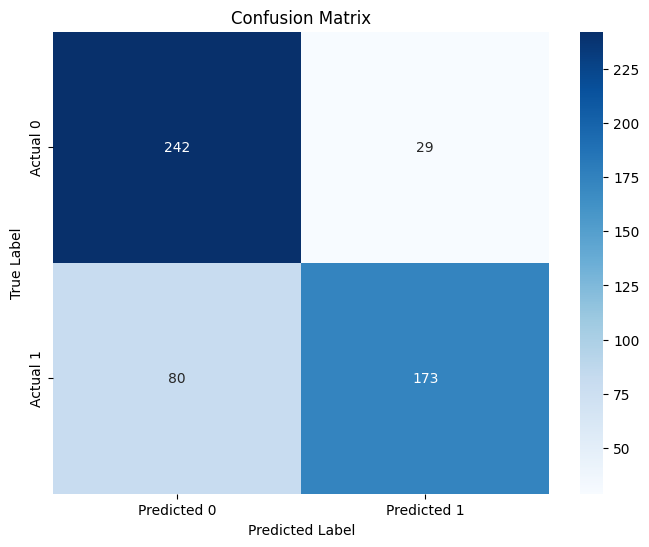

In [14]:
# Hitung confusion matrix
cm = confusion_matrix(df_clean['truth'], df_clean['detected'])

# Buat dataframe untuk confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Hitung metrik
accuracy = accuracy_score(df_clean['truth'], df_clean['detected'])
precision = precision_score(df_clean['truth'], df_clean['detected'])
recall = recall_score(df_clean['truth'], df_clean['detected'])
f1 = f1_score(df_clean['truth'], df_clean['detected'])

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Tampilkan metrik
print("\nMetrik Evaluasi:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[242  29]
 [ 80 173]]

Metrik Evaluasi:
Akurasi: 0.79
Precision: 0.86
Recall: 0.68
F1 Score: 0.76
